 # MP1 - ECE 498:  Data Science & Analytics
 
 
 # Group members (NetIDs): 
    
 ##   Akhilesh Somani (somani4)
 ##   Gowtham Kuntumalla (gowtham4)
 ##   Manan Mehta (mananm2)
 
 ## Registered for 4 credit hours

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
from datetime import datetime
from scipy import stats as st
import math

# to handle file imports for different OS
import os
from pathlib import Path 

# ----------------------------- Task 0 -----------------------------

In [2]:
folder = Path(os.getcwd())
file1 = folder / 'mp1_av_disengagements.csv'
file2 = folder / 'mp1_av_totalmiles.csv'
dseng_df = pd.read_csv(file1)
summary_month_df = pd.read_csv(file2)

In [3]:
dseng_df.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [4]:
summary_month_df.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30


### 0.2 (a) Total number of AV disengagements: 1024

In [5]:
dseng_df.count()

Month            1024
Car              1024
Location         1024
Weather          1024
TypeOfTrigger    1024
ReactionTime      492
Cause            1024
dtype: int64

### 0.2 (b) Number of unique months that have recorded AV disengagements: 15

In [6]:
dseng_df['Month_actual'] = dseng_df['Month'].apply(lambda x:x.split("-")[1])

In [7]:
dseng_df['Month'].nunique()

15

### 0.2 (c) List of unique locations of AV disengagements: 2

In [8]:
dseng_df['Location'].nunique()

2

### 0.2 (d) Number of unique causes for AV disengagements: 10 

In [9]:
dseng_df['Cause'].nunique()

10

### 0.2 (e) ReactionTime has 532 missing values because Manual Trigger

In [10]:
dseng_df.isnull().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
Month_actual       0
dtype: int64

### 0.3 The top two leading causes of disengagement: Recklessly behaving agent and Unwanted Driver Discomfort

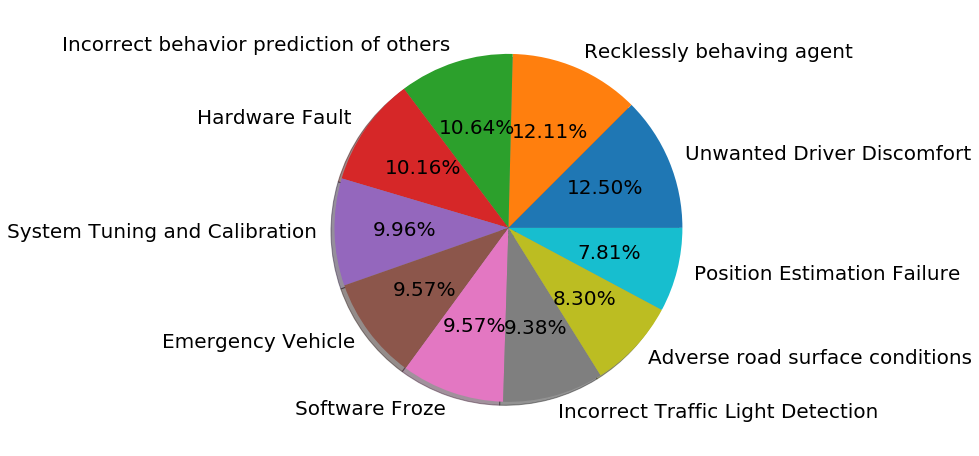

In [36]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = dseng_df['Cause'].value_counts()
causes = causes[causes>10]
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.2f%%', shadow=True)
#plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="upper left")
#plt.axis('equal')
plt.show()

### 0.4 AVs are indeed maturing over time

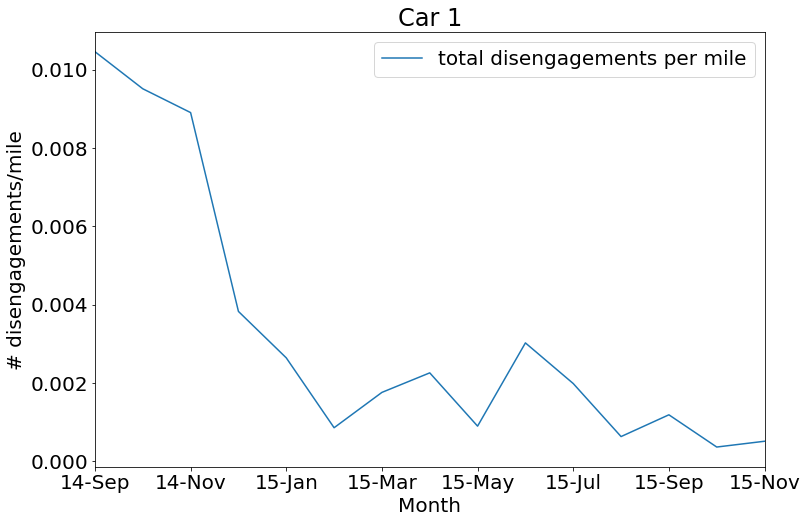

In [12]:
#disengagement/mile
summary_month_df['total disengagements per mile'] = summary_month_df['total number of disengagements']\
/summary_month_df['miles driven in autonomous mode']

#print(summary_month_df['total disengagement per mile'])

summary_month_df.iloc[:15,:].plot(x = 'Month',y = 'total disengagements per mile')
plt.xlabel('Month')
plt.ylabel('# disengagements/mile')
plt.title('Car 1')
plt.show()

# ----------------------------- Task 1 -----------------------------

### 1.1 Various distributions:

#### a. Gaussian distribution : 
Also called normal distribution, samples drawn from it follow the general distribution which is given by 
$$ {\ f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}} $$

Samples drawn are likely to be close to the mean. and those far away are less likely.

#### b. Exponential distribution:
Here the general distribution is given by 
$$ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases} $$

Samples drawn are likely to be close to Zero. Another key property is memorylessness. i.e. conditional probabability boils down to simple exponentials (only the time period matters not when it starts).

#### c. Weibull distribution:

Here the general distribution is given by 
$$ 
f(x;\lambda,k) =
\begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases} $$

It is a generalisation of standard exponential distribution (k = 1). 

If X = time-to-failure, then k < 1 indicates failure rate goes down as parts life increases, i.e. probaility that samples fail is very high when X is close to zero and then it decreases. Vice versa for k > 1.


### 1.2 Reaction times of drivers

In Weibull distribution fit, k value is 0.3


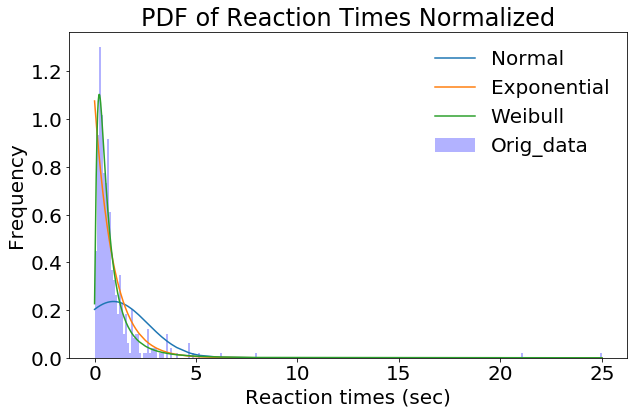

In [13]:

""" Actual PDF of reaction times using histograms """ 
plt.figure(figsize = (10,6))

reaction_t = dseng_df['ReactionTime'].dropna()
reaction_t.plot(kind='hist', bins  = 250, density = True, alpha=0.3, color = 'blue', label = 'Orig_data')

"""fitting scikit-learn stats model  """ 

x_data = sorted(reaction_t)
# normal
mean, var = st.norm.fit(x_data)
plt.plot(x_data, st.norm.pdf(x_data,mean,var), label = 'Normal')

# exponential
loc, scale = st.expon.fit(x_data)
plt.plot(x_data, st.expon.pdf(x_data,loc, scale), label = 'Exponential')

# weibull

args = st.exponweib.fit(x_data)
plt.plot(x_data, st.exponweib.pdf(x_data,*args), label = 'Weibull')
print("In Weibull distribution fit, k value is {0}".format(round(list(args)[1],2)))

plt.xlabel('Reaction times (sec)')
plt.ylabel('Frequency')
plt.title('PDF of Reaction Times Normalized')
plt.legend(frameon = False, loc = 'best')
plt.show()
 

### Observation: We see that the weibull distribution fits well. Parameter 'k' < 1 so the reaction times are largely populated in the beginning and go down with time.

### 1.3 Average Reaction Times

In [14]:
print("1.3(a) Average Reaction Time for entire data set = {0} sec \n\n".format(round(reaction_t.mean(),2)))

print("1.3(b) Average Reaction Time (sec) by \n")
print( round(dseng_df['ReactionTime'].groupby(dseng_df['Location']).mean(),2))


1.3(a) Average Reaction Time for entire data set = 0.93 sec 


1.3(b) Average Reaction Time (sec) by 

Location
highway         1.48
urban-street    0.93
Name: ReactionTime, dtype: float64


### 1.4 Hypothesis testing of reaction times 

Define 

H0 : AV_mean = 1.09 sec

H1 : AV_mean != 1.09 sec

Significance level  = 0.05

We will apply a two tail test asssuming H0 is true. We will test if 0.93 sec is in statistical limits of assumed population mean (= 1.09 sec)


In [15]:
std_AV_sample = reaction_t.std()
mean_AV_sample = reaction_t.mean()
mean_nonAV_pop = 1.09
est_std_AV_pop = std_AV_sample/math.sqrt(dseng_df['ReactionTime'].dropna().count())
z_stat = (mean_AV_sample - mean_nonAV_pop)/est_std_AV_pop

z_score = st.norm.cdf(z_stat)

print("Z-score ({0}) < 0.025 (two-tailed test) so we reject null hypothesis".format(round(z_score,3)))


Z-score (0.018) < 0.025 (two-tailed test) so we reject null hypothesis


### 1.5 PDF of Disengagements/mile with monthly granularity

In [16]:
# This function was taken from an external source (stackoverflow) and edited to fit our code
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

def get_best_distribution(data, distributions):
    results = []
    parameters = {}
    for distribution in distributions:
        dist = getattr(st, distribution)
        # fit the distribution and get parameters
        parameter = dist.fit(data)
        parameters[distribution] = parameter
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, distribution, args=parameter)
        results.append((distribution, p))

    # select the best fitted distribution
    best_distribution, best_p_value = (max(results, key = lambda item: item[1]))

    print("Best fitting distribution: " + str(best_distribution))
    print("Best p value: "+ str(best_p_value))
    print("Parameters for the best fit: "+ str(parameters[best_distribution]))

    return best_distribution, best_p_value, parameters[best_distribution]

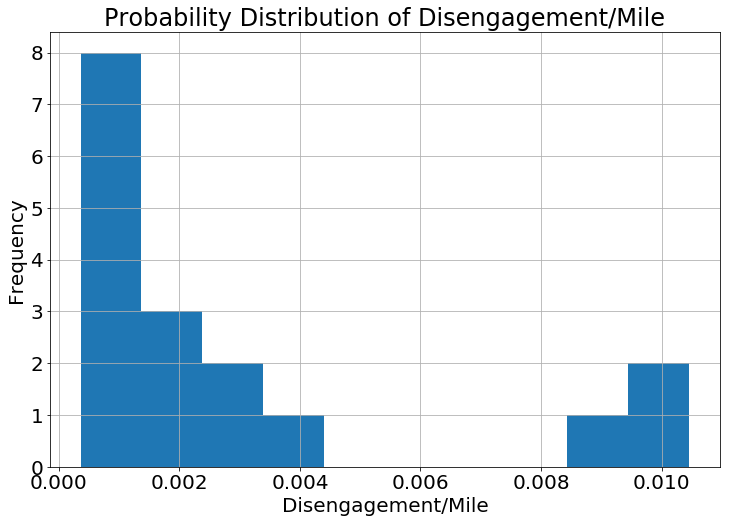

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1469: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Best fitting distribution: weibull_min
Best p value: 0.4962771751155636
Parameters for the best fit: (0.6345691062722936, 0.0003605973188528762, 0.003454002298430405)


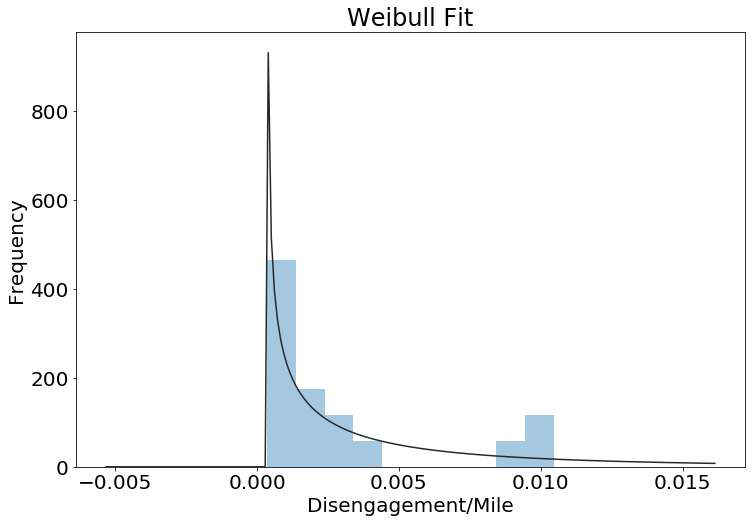

In [17]:

hist = summary_month_df['total disengagements per mile'].dropna().hist(bins = 10)
plt.title('Probability Distribution of Disengagement/Mile')
plt.xlabel('Disengagement/Mile')
plt.ylabel('Frequency')
plt.show()

data_to_fit = summary_month_df['total disengagements per mile'].dropna()
distributions = ['norm','expon','exponweib','weibull_min']
best_distribution, best_p_value, parameters = get_best_distribution(data_to_fit, distributions)

ax = sns.distplot(summary_month_df['total disengagements per mile'].dropna(), kde=False, fit=st.weibull_min, bins=10)
plt.title('Weibull Fit')
plt.xlabel('Disengagement/Mile')
plt.ylabel('Frequency')
plt.show()

Weibull_min distribution fits well. We see that the number of # of
Occurences of Disengagements/mile parameter goes down. 
(parameter k<1: Failure rate decreases over time)


# ----------------------------- Task 2 -----------------------------

# 2.1
### (a) The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a **Bernoulli distribution** where the only possible outcomes in a mile are disengagement or no disengagement. A combination of multiple miles follows a **Binomial** distribution.

### (b) Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day:

We first calculate the probability of disengagement per mile $ P(diseng) $

$ P(diseng) = \frac {Total Disengagements}{Total Miles} $

We then use Bayes Rule as follows:
    
$$ P(diseng | cloudy) = \frac {P(cloudy | diseng) P(diseng)}{P(cloudy)} $$

We can calculate $$ P(cloudy | diseng) = \frac{\text{Number of disengagements  in  cloudy  weather}} {\text{Total disengagements}} $$ from the disengagement dataset

We are assuming $ P(cloudy) = 1 - P(clear) = 1 - 0.72 = 0.28 $

In [18]:
p_diseng = summary_month_df['total number of disengagements'].sum()/summary_month_df['miles driven in autonomous mode'].sum()
p_cloudy = 0.28
p_cloudy_diseng = dseng_df['Weather'].value_counts()['cloudy']/len(dseng_df)
p_diseng_cloudy = p_cloudy_diseng * p_diseng / p_cloudy
print('The probability of disengagement per mile on a cloudy day is {}'.format(round(p_diseng_cloudy,5)))

The probability of disengagement per mile on a cloudy day is 0.0059


### (c) Based on the above assumptions, calculate the probability of disengagement per mile on a clear day:

Use the same approach as in 1 (b)

$$ P(diseng | clear) = \frac {P(clear | diseng) P(diseng)}{P(clear)} $$

In [19]:
p_clear = 0.72
p_clear_diseng = dseng_df['Weather'].value_counts()['clear']/len(dseng_df)
p_diseng_clear = p_clear_diseng * p_diseng / p_clear
print('The probability of disengagement per mile on a clear day is {}'.format(round(p_diseng_clear,5)))

The probability of disengagement per mile on a clear day is 0.00052


### (d) Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day:

Here we have an additional constraint of the disengagement being an automatic one. We can write

$$ P(diseng, automatic | cloudy) = \frac {P(cloudy, automatic | diseng) P(diseng)}{P(cloudy)} $$

and

$$ P(diseng, automatic | clear) = \frac {P(clear, automatic | diseng) P(diseng)}{P(clear)} $$

We can calculate $ P(cloudy, automatic | diseng) $ and $ P(clear, automatic | diseng) $ from the disengagement dataset

In [20]:
cloudy_automatic_count = 0
clear_automatic_count = 0
for i in range(len(dseng_df)):
    if (dseng_df.loc[i,'Weather']=='cloudy' and dseng_df.loc[i,'TypeOfTrigger']=='automatic'):
        cloudy_automatic_count += 1
    if (dseng_df.loc[i,'Weather']=='clear' and dseng_df.loc[i,'TypeOfTrigger']=='automatic'):
        clear_automatic_count += 1
p_cloudy_automatic_diseng = cloudy_automatic_count/len(dseng_df)
p_clear_automatic_diseng = clear_automatic_count/len(dseng_df)

p_diseng_automatic_cloudy = p_cloudy_automatic_diseng * p_diseng / p_cloudy
p_diseng_automatic_clear = p_clear_automatic_diseng * p_diseng / p_clear

print('The probability of an automatic disengagement per mile on a cloudy day is {}'.format(round(p_diseng_automatic_cloudy,5)))
print('The probability of an automatic disengagement per mile on a clear day is {}'.format(round(p_diseng_automatic_clear,5)))

The probability of an automatic disengagement per mile on a cloudy day is 0.00281
The probability of an automatic disengagement per mile on a clear day is 0.00026


### (e) How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions?

If we let $X$ be the random variable denoting the number of disengagements under cloudy conditions.

Thus, $X$ is **Binomially Distributed** with $ n = 12000 $ and $ p = P(diseng | cloudy) = 0.0059 $

#Reference for approximation: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/binomial-theorem/normal-approximation-to-the-binomial/
We have a large sample size (np = 70.8 > 5), so central limit theorem can be used.

Using the central limit theorem, we can say that $$ Z = \frac {X - \mu} {\sigma} $$ is **Standard Normal**, with $ \mu = np $ and $ \sigma^2 = np(1-p)$

Thus we need to find $$ P(X \ge 150) = P(X \ge 149.5) = 1 - P (X \le 149.5) = 1 - P(Z < \frac{149.5 - np}{\sqrt {np(1-p)}}) $$

We take 149.5 instead of 150 to account for the continuity correction

In [21]:
n = 12000
mu = n*p_diseng_cloudy
sigma = np.sqrt(n*p_diseng_cloudy*(1-p_diseng_cloudy))
p_150 = st.norm(mu,sigma).cdf(149.5)
#We take 149.5 instead of 150 to account for the continuity correction
print('Probability of 150 or more disengagements under cloudy conditions in 12000 miles is {}'.format(1 - p_150))
print("The value is very low. It is very unlikely that so many disengagements occur")

Probability of 150 or more disengagements under cloudy conditions in 12000 miles is 0.0
The value is very low. It is very unlikely that so many disengagements occur


# 2.2
### (a) What does the normal distribution represent in the hypothesis testing?
Normal Distribution represents the probability distribution of the random variable (under observation) of the sample drawn from a bigger population (assuming null hypothesis is true).

### (b) Does rejecting the null hypothesis mean accepting the alternative hypothesis? Explain.

No, we reject the null hypothesis due to lack of evidence under certain significance level ($\alpha $). We conclude that under these conditions alternate hypothesis is statistically probable. In other words, it is likely true. This is not the same as accepting it.


## 2.3 Hypothesis Testing using the Z-Test

### At a 0.05 significance level, test the following hypothesis: The AV has more disengagements (automatic and manual) on cloudy days than clear days. Based on the result of the hypothesis test, what can you conclude about the impact of weather conditions on AV safety?

We can use hypothesis testing for difference in 2 proportions.

We can formulate the Null and Alternate Hypothesis as follows:

$$ H_o : \text{Number of disengagements on cloudy days} \leq \text{Number of disengagements on clear days}$$ and


$$ H_a : \text{Number of disengagements on cloudy days} > \text{Number of disengagements on clear days}$$

n1 = total AV miles ridden * p(cloudy) --> population 1 (cloudy) <br>
n2 = total AV miles ridden * p(clear) --> population 2 (clear)<br>

X1 = total no. of disengagement when cloudy <br>
X2 = total no. of disengagement when clear 

$$\hat{p1} = \frac{X1}{n1}$$ <br>
$$\hat{p2} = \frac{X2}{n2}$$ <br>
$$\hat{p} = \frac{X1 + X2}{n1 + n2}$$ <br>
$$\hat{q} = 1- \hat{p}$$ <br>

Hypothesis testing: <br>

H0 (Null): $$\hat{p1} - \hat{p2} \le 0 $$ <br> i.e. cloudy days have less disengagements than clear days <br> <br>
H1 (Alternate): $$\hat{p1} - \hat{p2} > 0 $$ <br>


Test-Statistic =  $$ Z =  \frac {(\hat{p1} - \hat{p2})- 0} {\sqrt {\hat{p}\hat{q} (\frac{1}{n1}+\frac{1}{n2})} }  $$ <br>

we use the **right tailed test on the normal distribution** 
$$ Z_{dist} \approx N(0,\sqrt {\hat{p}\hat{q} (\frac{1}{n1}+\frac{1}{n2})} )$$


In [22]:
X1 = sum(dseng_df['Weather'] == 'cloudy')
n1 = summary_month_df['miles driven in autonomous mode'].sum()*p_cloudy
p_hat_1 = X1/n1 

X2 = sum(dseng_df['Weather'] == 'clear')
n2 = summary_month_df['miles driven in autonomous mode'].sum()*p_clear
p_hat_2 = X2/n2 

p_hat = (X1+X2)/(n1+n2)
q_hat = 1-p_hat

Z_stat = (p_hat_1-p_hat_2)/math.sqrt(p_hat*q_hat*(1/n1+1/n2))

p_value = 1-st.norm.cdf(Z_stat)
print("Z_stat is {0:0.{1}f}".format(Z_stat,3))
print("p_value is {0} << 0.05. Hence we reject H0, and say that \nIt is statistically likely that number of \
disengagements on a cloudy day are more than a clear day".format(p_value))

Z_stat is 38.199
p_value is 0.0 << 0.05. Hence we reject H0, and say that 
It is statistically likely that number of disengagements on a cloudy day are more than a clear day


## 2.4
### (a) Find the conditional probability that the reaction time is greater than 0.6s given that the weather was cloudy?

In [23]:
cloudy_automatic_count = 0
cloudy_automatic_reactiontime_count = 0
for i in range(len(dseng_df)):
    if (dseng_df.loc[i,'Weather']=='cloudy' and dseng_df.loc[i,'TypeOfTrigger']=='automatic'):
        cloudy_automatic_count += 1
    if (dseng_df.loc[i,'Weather']=='cloudy' and dseng_df.loc[i,'TypeOfTrigger']=='automatic' and dseng_df.loc[i,'ReactionTime']>0.6):
        cloudy_automatic_reactiontime_count += 1

p_cloudy_automatic_reactiontime = cloudy_automatic_reactiontime_count/cloudy_automatic_count
print('Probability that the reaction time is greater than 0.6s given that the weather was cloudy is {}'.format(round(p_cloudy_automatic_reactiontime,3)))

Probability that the reaction time is greater than 0.6s given that the weather was cloudy is 0.474


### (b) Find the conditional probability that the reaction time is greater than 0.9s given that the weather was clear?

In [24]:
clear_automatic_count = 0
clear_automatic_reactiontime_count = 0
for i in range(len(dseng_df)):
    if (dseng_df.loc[i,'Weather']=='clear' and dseng_df.loc[i,'TypeOfTrigger']=='automatic'):
        clear_automatic_count += 1
    if (dseng_df.loc[i,'Weather']=='clear' and dseng_df.loc[i,'TypeOfTrigger']=='automatic' and dseng_df.loc[i,'ReactionTime']>0.9):
        clear_automatic_reactiontime_count += 1

p_clear_automatic_reactiontime = clear_automatic_reactiontime_count/clear_automatic_count
print('Probability that the reaction time is greater than 0.9s given that the weather was clear is {}'.format(round(p_clear_automatic_reactiontime,3)))

Probability that the reaction time is greater than 0.9s given that the weather was clear is 0.281


## 2.5 Theorem of Total Probability
### A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.6s under cloudy conditions and, (ii) a reaction time greater than 0.9s under clear conditions. Find the probability of an accident per mile involving an AV disengagement

$$ P(accident/mile) = P(accident | cloudy, diseng) P(diseng | cloudy) P(cloudy) + P(accident | clear, diseng)  P(diseng | clear)  P(clear)$$
thus
$$ P(accident/mile) = P(RT>0.6s | cloudy, diseng) P(diseng | cloudy) P(cloudy) + P(RT>0.9s | clear, diseng)  P(diseng | clear)  P(clear)$$

In [25]:
p_accident_AV = p_cloudy_automatic_reactiontime*p_diseng_automatic_cloudy*p_cloudy + p_clear_automatic_reactiontime*p_diseng_automatic_clear*p_clear
print('Probability of an accident per mile for an AV disengagement is {}'.format(round(p_accident_AV,5)))

Probability of an accident per mile for an AV disengagement is 0.00043


## 2.6 Compare AVs to Human Drivers
### The probability of a human driver causing a car accident is $2$ x $10^{-6}$. How do AVs compare to human drivers? Justify your conclusion and explain its consequences.

$P(accident)$ for an AV is $\approx 4.26$ x $10^{-4}$ which is roughly **213 times higher** than human drivers. The consequence is that more work has to go in to make AVs as safe as human drivers, so that they can be put on the streets with equal (if not more) confidence.

## 2.7 Hypothesis test on unknown distributions:

### The hypothesis test you performed in this task is an example of a parametric test that assumes that the observed data is distributed similarly to some other well-known distribution (such as a normal distribution). However, sometimes, we need to compare two distributions of data that don’t follow any such well-known distributions. Perform a two-sample Kolmogorov-Smirnov test (using the ks_2samp package from Scipy) to compare the following two distributions: 

### (1) distribution of disengagement reaction time when the weather is cloudy and 

### (2) distribution of disengagement reaction time when the weather is clear. 

### What are your null and alternative hypotheses? Assuming a significance level threshold of 0.1, what can you conclude from the test results about the impact of weather conditions on disengagement reaction time?

We can formulate the Null and Alternate Hypothesis as follows:

$$ H_o : \text{The reaction times in cloudy and clear weathers can be drawn from the same continuous distribution} $$
and
$$ H_a : \text{The reaction times in cloudy and clear weathers are from different distributions} $$

In [26]:
cloudy_reaction_times = []
clear_reaction_times = []
tempdf = dseng_df.dropna()
for i in tempdf.index:
    if (tempdf.loc[i,'Weather'] == 'cloudy'):
        cloudy_reaction_times.append(tempdf.loc[i,'ReactionTime'])
    if (tempdf.loc[i,'Weather'] == 'clear'):
        clear_reaction_times.append(tempdf.loc[i,'ReactionTime'])
ks_stat, p_value = st.ks_2samp(cloudy_reaction_times, clear_reaction_times)
print('The KS Statistic for the performed hypothesis test is {} and the p-value is {}'.format(round(ks_stat,3),round(p_value,3)))

if p_value > 0.1:
    print('\np-value ({}) > significance level (0.1)\nDo not reject null hypothesis \nThe reaction times in cloudy and clear weathers may be drawn from the same continuous distribution'.format(round(p_value,3)))
else:
    print('\np-value ({}) < significance level (0.1)\n Reject Null Hypothesis \n \
    The reaction times in cloudy and clear weathers are from different distributions'.format(p_value))

The KS Statistic for the performed hypothesis test is 0.051 and the p-value is 0.984

p-value (0.984) > significance level (0.1)
Do not reject null hypothesis 
The reaction times in cloudy and clear weathers may be drawn from the same continuous distribution


Here the **p-value is very high** and the **KS-statistic very low**. Both of these indicate a very high confidence in the Null Hypothesis. We can say with high certainty that **reaction times in both weathers are drawn from the same continuous distribution**.

In [27]:
_,_,_ = get_best_distribution(cloudy_reaction_times, ['norm','exponweib','weibull_min','expon'])
_,_,_ = get_best_distribution(clear_reaction_times, ['norm','exponweib','weibull_min','expon'])

Best fitting distribution: exponweib
Best p value: 0.7586716405657775
Parameters for the best fit: (40.183464291899924, 0.32933509104489334, -0.08436915261654243, 0.008925160025582357)
Best fitting distribution: exponweib
Best p value: 0.9020347448843626
Parameters for the best fit: (69.12912308357286, 0.28763395942580006, -0.08083639869513057, 0.0031774218474021603)


As clearly seen, both distributions fit the Exponentiated Weibull very well (p values 0.76 and 0.90)

**We can conclude that the disengagement reaction times are independent of weather conditions.**

# ----------------------------- Task 3 -----------------------------

## 3.1 Including a 'Class' column:

In [28]:
#Adding a column names "Class" 
dict_names={'Incorrect behavior prediction of others':'Controller','Recklessly behaving agent':'Controller',\
           'Unwanted Driver Discomfort':'Controller','Adverse road surface conditions':'Perception System',\
           'Emergency Vehicle':'Perception System','Position Estimation Failure':'Perception System',\
           'Incorrect Traffic Light Detection':'Perception System','System Tuning and Calibration':'Computer System',\
           'Hardware Fault':'Computer System','Software Froze':'Computer System'}

dseng_df['Class']=dseng_df['Cause'].map(dict_names)

## 3.2 Split the data into training and testing (80-20 split):

In [29]:
'''
We can use the train_test_split to do this, but black boxes of code aren't preferable

from sklearn.model_selection import train_test_split

X = dseng_df[['Location','Weather','TypeOfTrigger']].values
y = dseng_df[['Class']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

'''
ratio = 0.8

shuffled_df = (dseng_df[['Class','Location','Weather','TypeOfTrigger']]
               .sample(frac = 1)
               .reset_index()
               .drop('index',axis = 1))
train_df = shuffled_df.loc[:int(ratio*len(shuffled_df))]
test_df = shuffled_df.loc[int(ratio*len(shuffled_df)):]

#We use the standard X_train, X_test, y_train, y_test format
X_train = train_df[['Location','Weather','TypeOfTrigger']].values
X_test = test_df[['Location','Weather','TypeOfTrigger']].values
y_train = train_df[['Class']].values
y_test = test_df[['Class']].values

## 3.3 Train the Naive Bayes model based on the features. Show the conditional probability tables.

In [30]:
def train_naive_bayes(train_df, class_labels, feature_labels):
    
    class_prob = {}
    conditional_prob = pd.DataFrame(columns = feature_labels)

    for label in class_labels:
        class_prob[label] = train_df['Class'].value_counts()[label] / len(train_df)    
        
        for feature in feature_labels:
            num = len(train_df[(train_df['Class']==label) & ((train_df['Location']==feature) | (train_df['Weather']==feature) | (train_df['TypeOfTrigger']==feature))])
            den = len(train_df[(train_df['Class']==label)])
            conditional_prob.loc[label,feature] = num/den
    
    return class_prob, conditional_prob

class_labels = train_df['Class'].unique().tolist()
feature_labels = (train_df['Location'].unique().tolist() + train_df['Weather'].unique().tolist() + train_df['TypeOfTrigger'].unique().tolist())

class_prob, conditional_prob = train_naive_bayes(train_df, class_labels, feature_labels)

print('The following are the class probabilities or "priors" \n{}\n'.format(class_prob))
print('Conditional Probability Table or "likelihoods" are as shown:\n')
conditional_prob

The following are the class probabilities or "priors" 
{'Perception System': 0.34146341463414637, 'Controller': 0.35609756097560974, 'Computer System': 0.3024390243902439}

Conditional Probability Table or "likelihoods" are as shown:



,urban-street,highway,cloudy,clear,manual,automatic
Perception System,1,0,1,0,0.164286,0.835714
Controller,1,0,0.996575,0.00342466,0.880137,0.119863
Computer System,0.923387,0.0766129,0.407258,0.592742,0.512097,0.487903


The priors are the required $P(C_k)$. The CPT shows $P(column | row)$ which are the required $ P( x_i | C_k ) $

## 3.4 Predict the labels for the test dataset and compute the accuracy

In [31]:
def predict_labels(X_test, class_prob, conditional_prob):
    y_predicted = []
    labels = conditional_prob.index.tolist()
    for i in range(len(X_test)):
        temp = {}
        for label in labels:
            p = class_prob[label]
            for feature in X_test[i]:
                p *= conditional_prob.loc[label, feature]
            temp[label] = p
        map_label = [index for index, value in temp.items() if value == max(temp.values())] #basically argmax over all k
        y_predicted.append(map_label)
    return np.asarray(y_predicted)            

y_predicted = predict_labels(X_test, class_prob, conditional_prob)

accuracy = (y_predicted == y_test).sum()/len(y_test)*100

print('The accuracy of the model is {:.2f} %'.format(accuracy))

The accuracy of the model is 79.51 %


## 3.5 Cross Validation:

In [32]:
accuracies = []
for i in range(5):
    shuffled_df = (dseng_df[['Class','Location','Weather','TypeOfTrigger']]
               .sample(frac = 1)
               .reset_index()
               .drop('index',axis = 1))
    train_df = shuffled_df.loc[:int(ratio*len(shuffled_df))]
    test_df = shuffled_df.loc[int(ratio*len(shuffled_df)):]
    
    X_test = test_df[['Location','Weather','TypeOfTrigger']].values
    y_test = test_df[['Class']].values
    
    class_prob, conditional_prob = train_naive_bayes(train_df, class_labels, feature_labels)
    
    y_predicted = predict_labels(X_test, class_prob, conditional_prob)

    accuracy = (y_predicted == y_test).sum()/len(y_test)*100

    accuracies.append(accuracy)
print('The percentage accuracies for random splits of test data are \n{}'.format(accuracies))
print('The mean accuracy for the NB model is {:.2f}%'.format(np.mean(accuracies)))

The percentage accuracies for random splits of test data are 
[80.48780487804879, 76.09756097560975, 75.60975609756098, 81.95121951219512, 77.5609756097561]
The mean accuracy for the NB model is 78.34%


## 3.6 Is the NB model doing better than chance? Explain.

Average accuracy of Naïve Bayes model is around 78 percent, so it classifies roughly 78 percent data correctly.
If we were to leave the class assignment to chance, the number of correct classifications we could have obtained would be Expectation value, which is 33.3% (probability of correct classification = 1/3).
Hence, the Naïve Bayes model definitely performs better than simple guessing.

## 3.7 What are the assumptions in NB in context of this problem? Are they realistic? Explain.
The main assumption is that the features used for classification - Location, Weather and Type of Trigger - are independent of each other given the class.
$$p({x_i}|{x_{i + 1}},{x_{i + 2}},..,{x_n},{C_k}) = p({x_i}|{C_k})$$

## 3.8 Based on your answer to Part 7, comment on whether any improvements can be gained in classification accuracy. If yes, how?

Possible improvements are:

(1) Trying to incorporate more features into the classification study and then applying the Naïve Bayes model

(2) Discarding the assumption that the features are independent, and constructing a Bayesian network to better understand the impact of one feature on another


# Other Insights

### 1. Effect of Location Feature on the NB Model accuracy

In [33]:
X_test_new = X_test[:,[1,2]]
y_predicted_new = predict_labels(X_test_new, class_prob, conditional_prob)
accuracy_new = (y_predicted_new == y_test).sum()/len(y_test)*100
print('The accuracy of the model without considering Location feature is {:.2f} %'.format(accuracy_new))

The accuracy of the model without considering Location feature is 75.12 %


In [34]:
dseng_df[dseng_df['Location']=='highway']

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Month_actual,Class
326,14-Nov,WDD2221851A001072,highway,cloudy,automatic,1.48,Hardware Fault,Nov,Computer System
418,14-Dec,WDD2221851A001072,highway,clear,manual,NaN,Software Froze,Dec,Computer System
421,14-Dec,WDD2221851A001072,highway,clear,manual,NaN,Software Froze,Dec,Computer System
449,15-Jan,WDD2221851A001072,highway,clear,manual,NaN,Hardware Fault,Jan,Computer System
550,15-Mar,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Mar,Computer System
673,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Jun,Computer System
689,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Jun,Computer System
698,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Software Froze,Jun,Computer System
701,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Software Froze,Jun,Computer System
713,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,System Tuning and Calibration,Jun,Computer System


Very clearly, for 'Location' = 'highway', the TypeOfTrigger is almost always 'manual'. Also, the number of highway disengagements is very small compared to the number of urban disengagements. In turn, looking at the CPT, we see that the locations have little to no effect on the classification (the probabilities for each class are ~ [1,0]).

We thus tried to perform the classifications parsing the Location feature. **The accuracy remained almost unchanged**!

### 2. Visualization of Task 2.7

In Task 2.7, we performed a two-sample Kolmogorov-Smirnov test and concluded that the reaction times for both cloudy and clear weathers may be drawn from the same underlying continuous distribution. We tried to visualize this for intuition and the plot is shown below. The best Exponentiated Weibull fits for both reaction times (almost) overlap which visually supports our conclusion.

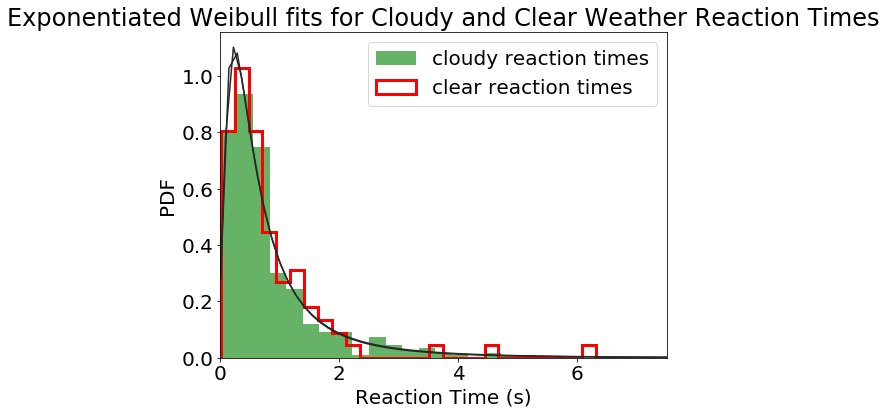

In [35]:
cloudy_rxntime = dseng_df[dseng_df['Weather']=='cloudy']['ReactionTime'].dropna()
clear_rxntime = dseng_df[dseng_df['Weather']=='clear']['ReactionTime'].dropna()

plt.figure(figsize=(8,6))
sns.distplot(cloudy_rxntime, kde=False, fit=st.exponweib, bins=90, label = 'cloudy reaction times', hist_kws={"linewidth": 3,
                            "alpha": 0.6, "color": "green"})
sns.distplot(clear_rxntime, kde=False, fit=st.exponweib, bins=90, label = 'clear reaction times', hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "red"})
plt.xlim([0,7.5])
plt.ylabel('PDF')
plt.xlabel('Reaction Time (s)')
plt.title('Exponentiated Weibull fits for Cloudy and Clear Weather Reaction Times')
plt.legend()
plt.show()